`Your GitHub repo is the brain, Docker is the body, GitHub Actions is the nervous system, ECR is the warehouse, and EC2 is the machine that runs everything for real users.`

### 1️⃣ DOCKER (Packaging Layer) — “Freeze my app + environment”
What Docker REALLY is (not what tutorials say)

- Docker is not deployment.
- Docker is not AWS.
- Docker is not CI/CD.



Docker is simply:

- A way to package your code + OS + Python + dependencies into ONE immutable unit. That unit is called an **image.**


#### Your Dockerfile — what it truly means:

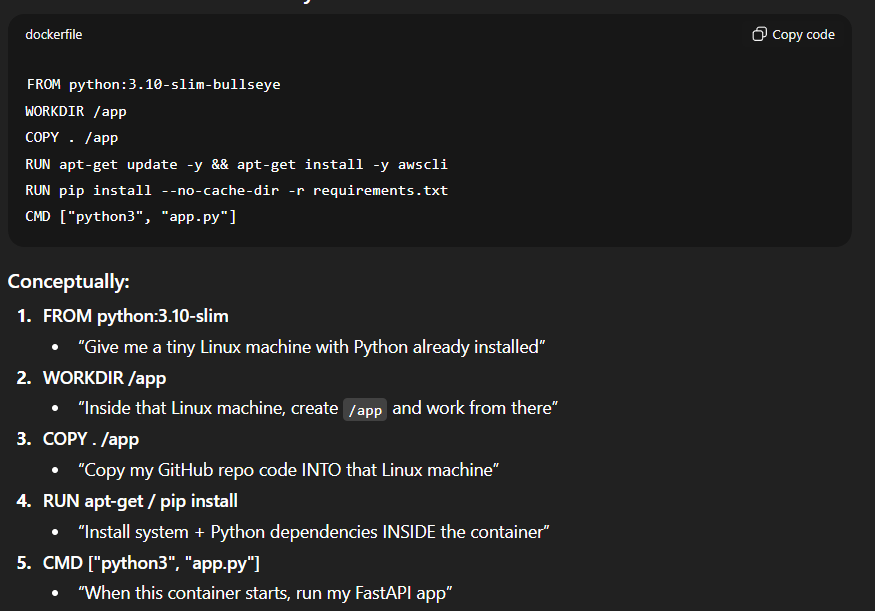


💡 Important mental shift

This container is now:

1. independent of your laptop

2. independent of GitHub

3. independent of AWS

4. reproducible anywhere


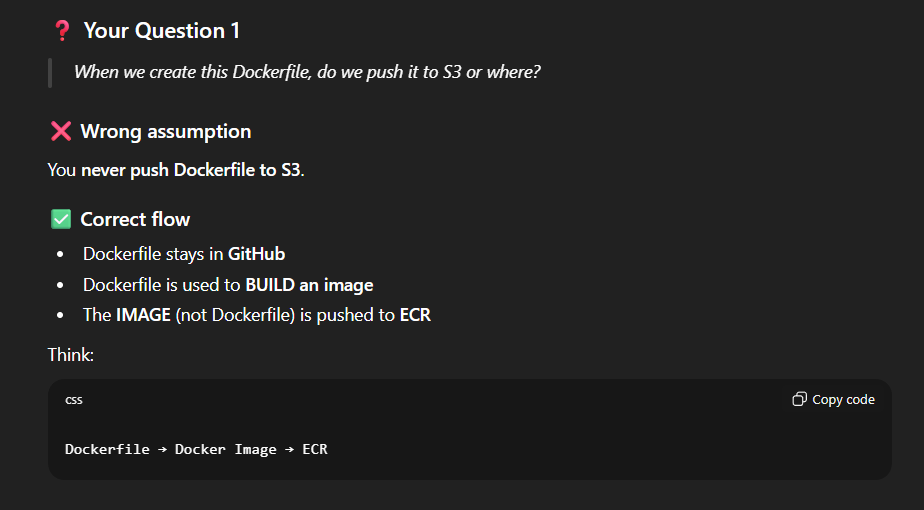

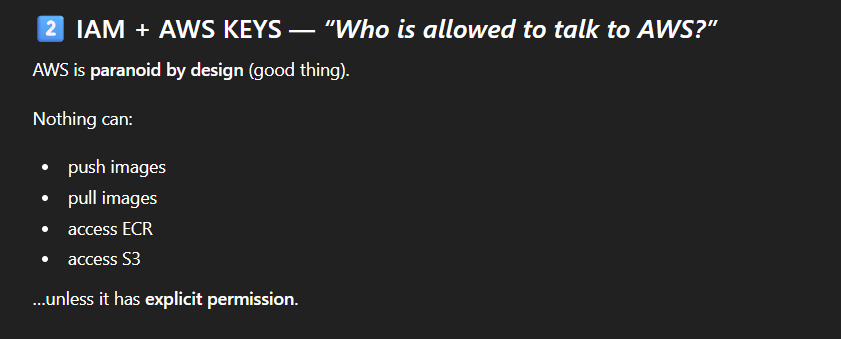
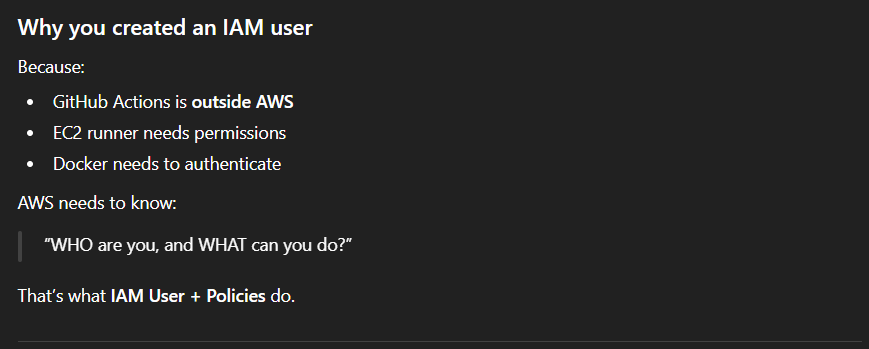
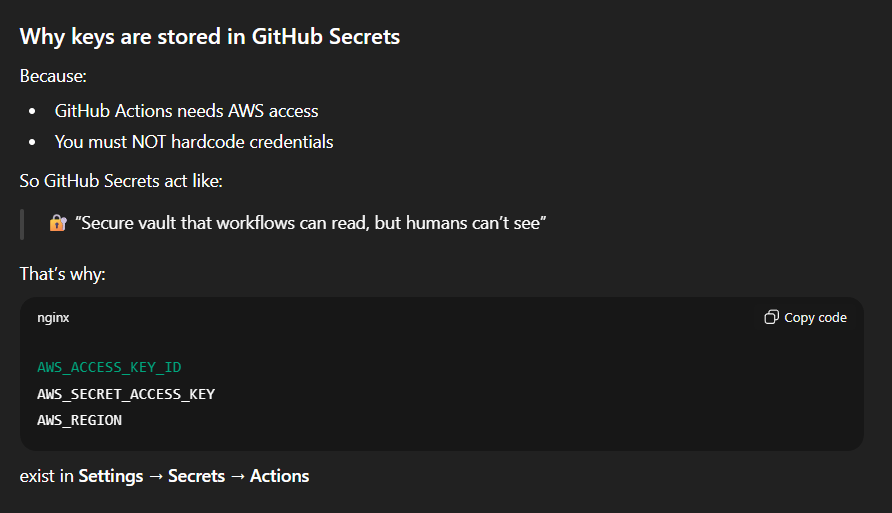
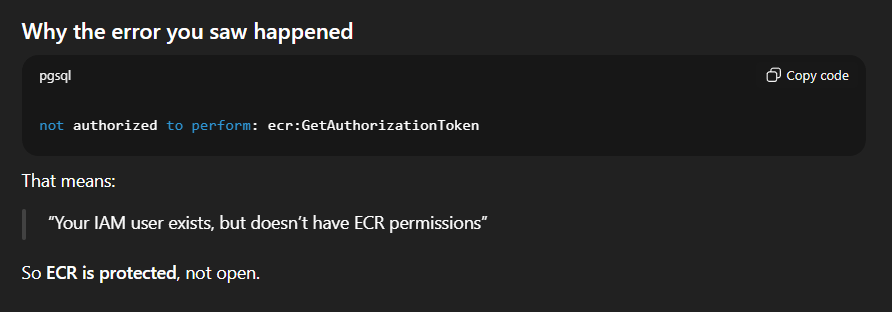

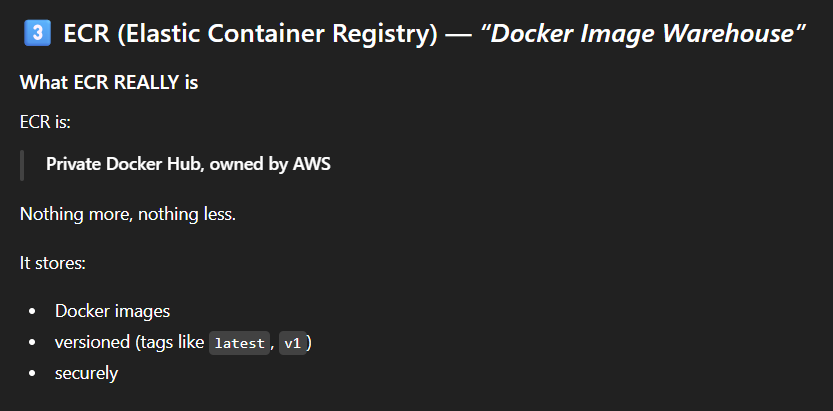
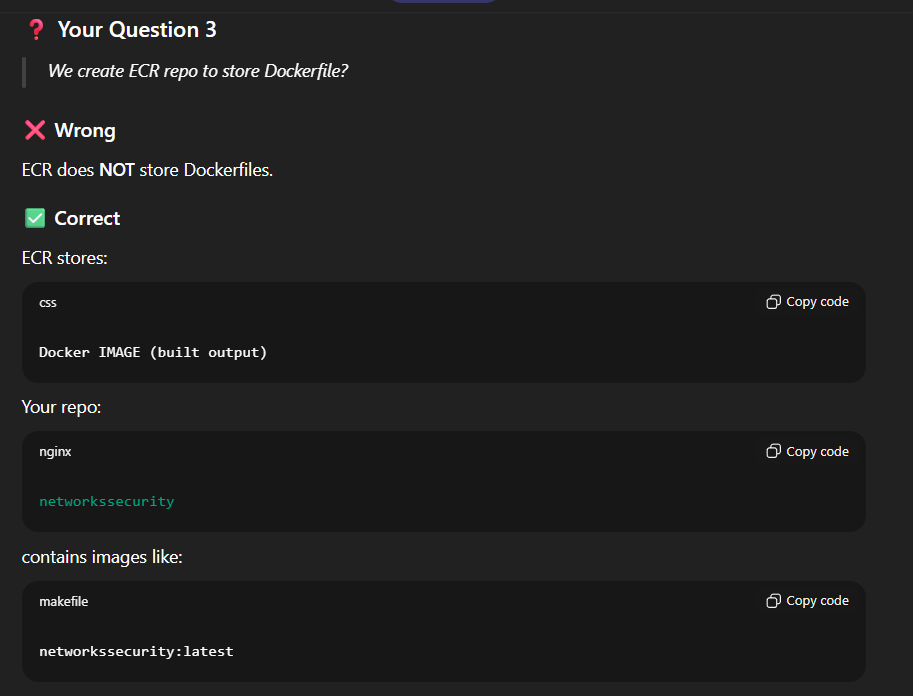
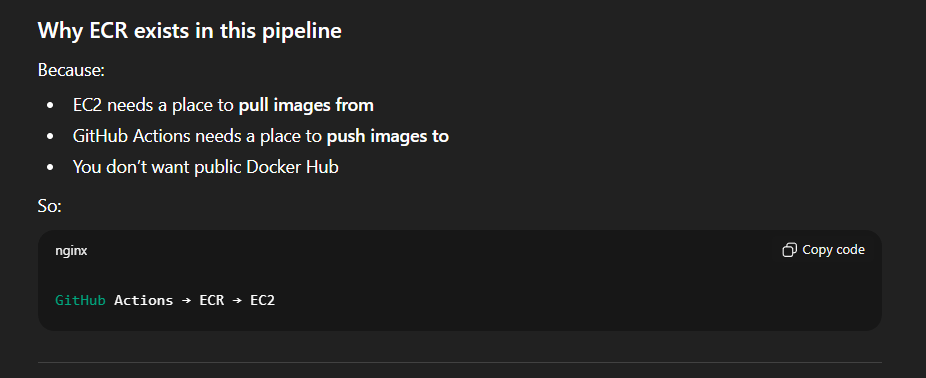

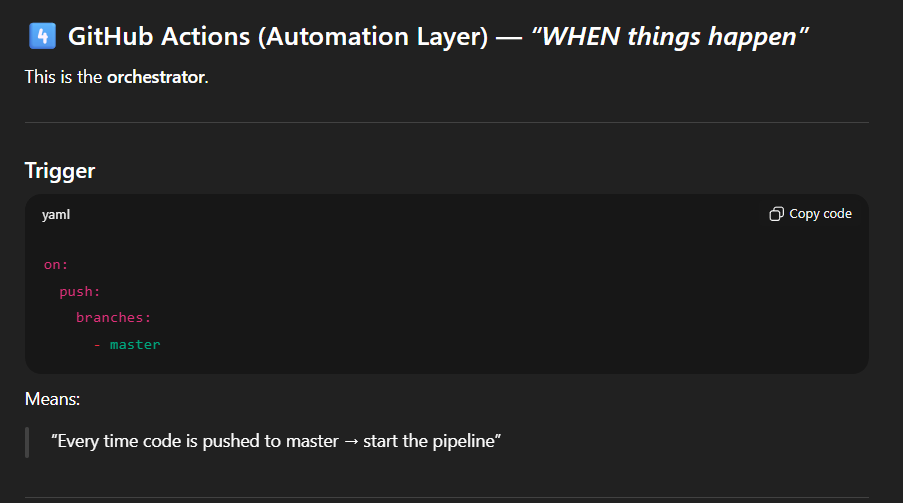
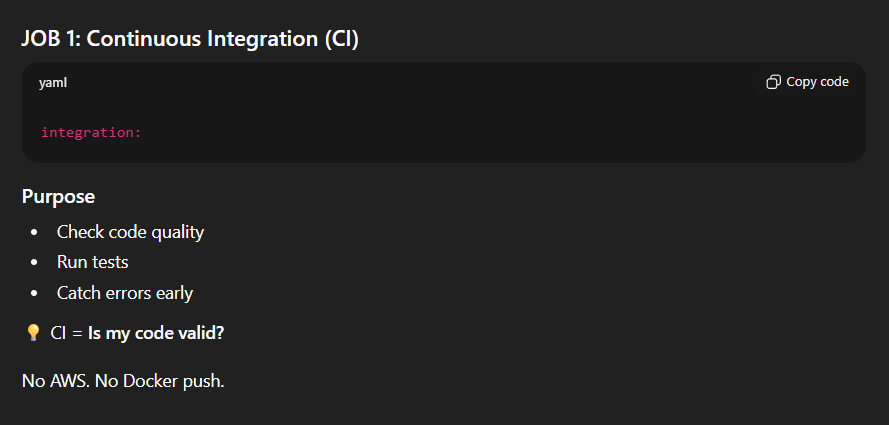
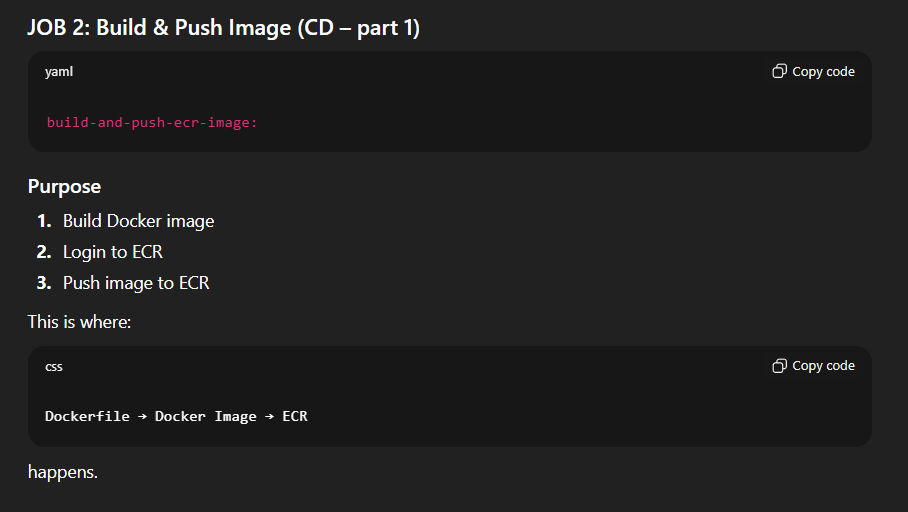
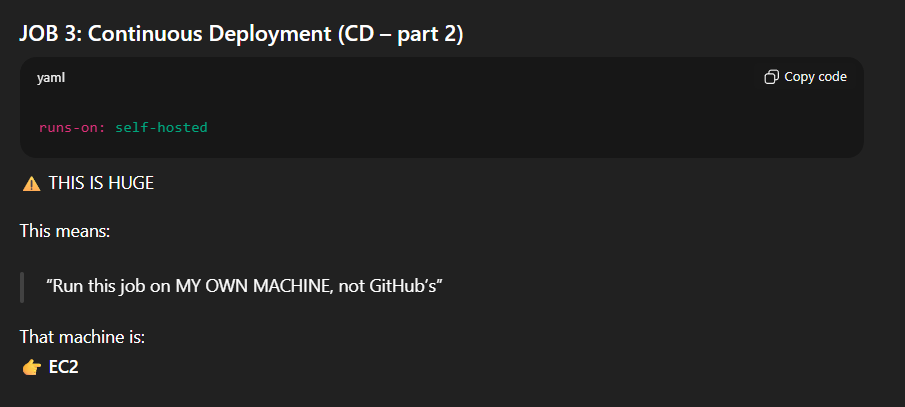


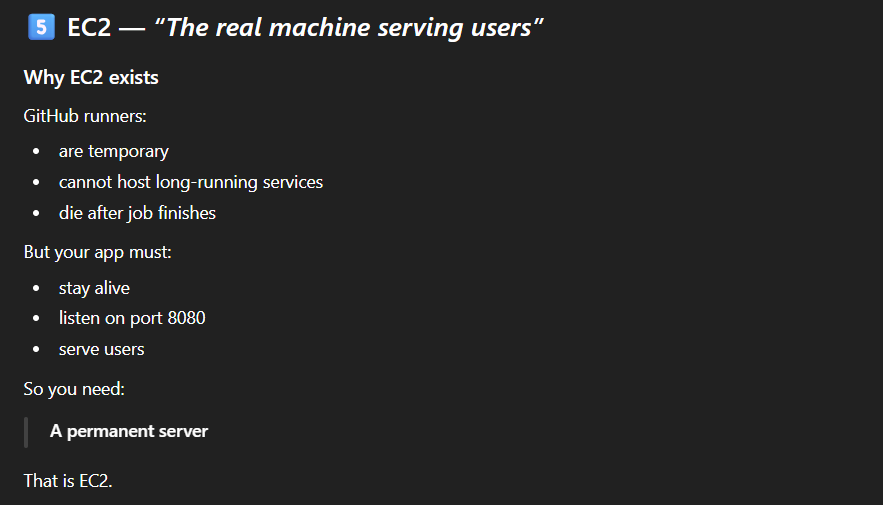
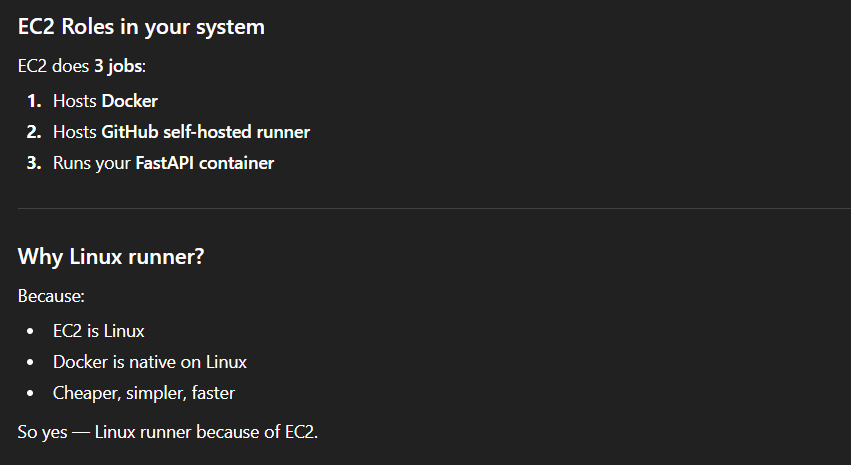


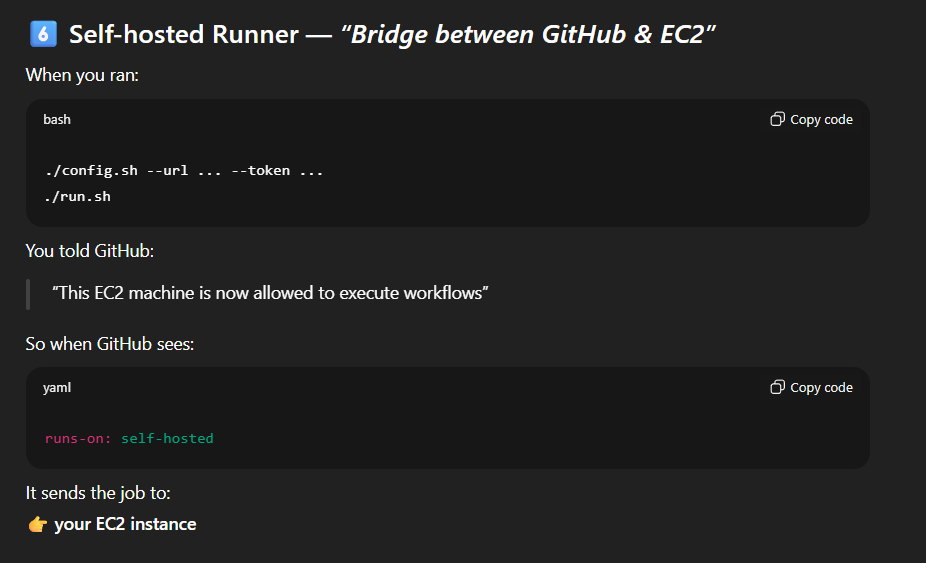

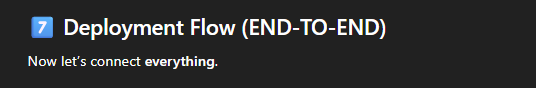

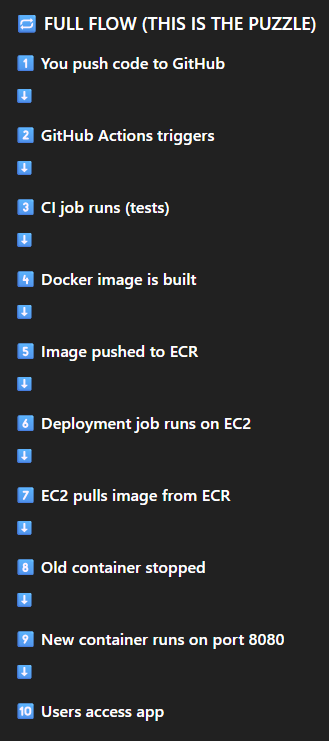

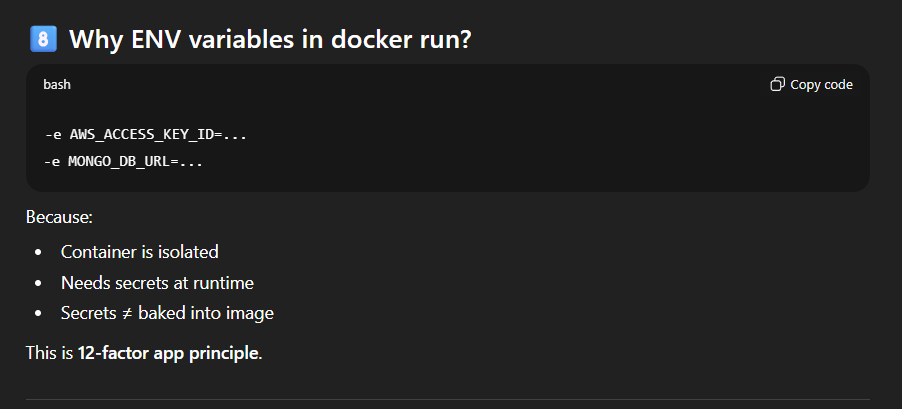

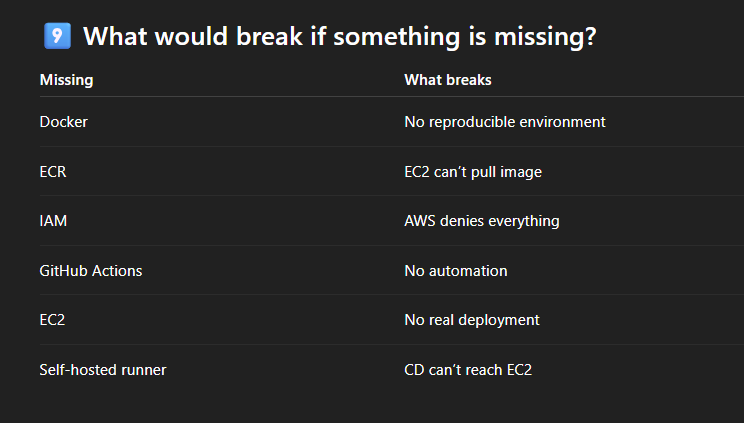

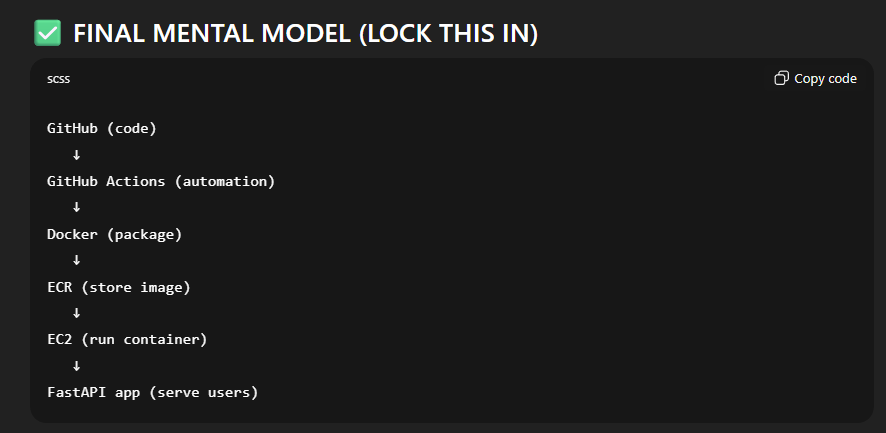

`1. DockerFile:` A packaging layer to free the app and its required environments. A way to package your code + OS + Python + dependencies into ONE immutable unit. That unit is called an **image.**

`2. IAM + AWS Keys`: Who is allowed to talk to AWS?

`3. ECR (Elastic Container Registry)`: Docker Image Warehouse. ECR is a private Docker Hub, owned by AWS, nothing more and nothing less.

ECR exists in this pipeline because:
1. **EC2** instance needs a place **to pull the images from.**
2. **GitHub** Actions needs **a place to push images to.**
3. We don't want a public Docker Hub.

`4. GitHub Actions (Automation Layer)`: When things happen. This is the Orchestrator.

**4.1 Trigger:** "Every time code is pushed to master -> Start the pipeline" 

**4.2 JOB 1: Continuous Integration (CI):**
Purpose:
- Checks Code Quality
- Run tests
- Catch errors early
- **CI** = Is My Code Valid?

No AWS, No Docker Push

**4.3 JOB 2: Build & Push Image (CD - Part 1):**
Purpose:
- Build Docker Image
- Loging to ECR
- Push the image to ECR
This is where `Docker File -> Docker Image -> ECR` happens.


**4.4 JOB 3: Continuous Deployment (CD - Part 2):**
This part is HUGE. This section means:
`Run this job on MY OWN MACHINE, not GitHub's` **and that machine is:** `EC2`





`5. EC2: The real machine serving the users`:

- To stay alive and keep listening to port 8080 to server the users, a permanent server, this is **EC2**.
- EC2 does three main jobs:
1. Hosts Docker Image by pulling from the ECR.
2. Hosts GitHub self-hosted runner
3. Runs our FastAPI Container if we are using FastAPI for the endpoints.


`6. Self-hosted Runner — “Bridge between GitHub & EC2”`:

We ran some commands from the GitHub runners on the EC2 command line to tell GiHub that this EC2 machine is now allowed to execute the workflows.






# 🧠 MLOps CI/CD — 1-PAGE REAL-WORLD REVISION NOTE

*(ML Engineer Perspective)*

---

## 🎯 REAL-WORLD SCENARIO (VERY IMPORTANT)

> You are an **ML Engineer** in a company.
> Your job is to **serve an ML model as an API** so that:

* Product team can use it
* It runs 24/7
* Updates deploy automatically
* Nothing breaks when you push code

---

# 1️⃣ PACKAGING — Docker

### **Problem in real world**

> “It works on my laptop, but crashes on the server.”

### **Solution**

**Docker**

### What Docker does

* Packages:

  * Python version
  * ML libraries (numpy, pandas, torch, fastapi)
  * Your ML code
* Freezes everything into **ONE portable unit**

### Dockerfile = recipe

### Docker Image = cooked food

### Docker Container = running food on a plate 🍽️

#### In real life:

> As an ML Engineer, you **never deploy raw Python code**.
> You deploy **Docker images**.

---

# 2️⃣ AUTOMATION — GitHub Actions

### **Problem in real world**

> “Do I manually deploy every time I change code?”

### **Solution**

**CI/CD pipelines**

---

## CI (Continuous Integration)

Runs when you push code.

### Purpose:

* Run tests
* Lint code
* Catch bugs early

💡 *“Is my code safe to deploy?”*

---

## CD (Continuous Deployment)

Runs **after CI passes**.

### Purpose:

* Build Docker image
* Push image to registry
* Deploy automatically

💡 *“Ship this safely to production.”*

---

### Real-world ML example:

You update:

* Feature engineering
* Model version
* Inference logic

You push → pipeline runs → deployment happens
**No manual SSH, no human error**

---

# 3️⃣ IMAGE STORAGE — AWS ECR

### **Problem in real world**

> “Where do I store Docker images securely?”

### **Solution**

**Amazon ECR**

### What ECR is

* Private Docker Hub
* Stores Docker **images**, not code
* Versioned & secure

### Flow:

```
Dockerfile → Docker Image → ECR
```

💡 *ML reality*:
Your **training code**, **model**, and **inference service** all end up inside Docker images stored in ECR.

---

# 4️⃣ PERMISSIONS — IAM & Secrets

### **Problem in real world**

> “Who is allowed to push/pull images?”

### Solution

**IAM + GitHub Secrets**

### Why IAM

* AWS trusts nobody by default
* Explicit permissions required

### Why GitHub Secrets

* Pipelines need AWS access
* Credentials must stay hidden

💡 *Industry rule*:

> Never hardcode credentials — ever.

---

# 5️⃣ DEPLOYMENT MACHINE — EC2

### **Problem in real world**

> “Where does my API actually run?”

### Solution

**EC2 (Linux Server)**

### EC2 role:

* Always-on server
* Runs Docker containers
* Serves users 24/7

### Why not GitHub runners?

* Temporary
* Die after job finishes
* Cannot host production services

💡 *ML Engineer reality*:

> Your model API must **stay alive**, not just run once.

---

# 6️⃣ SELF-HOSTED RUNNER — Bridge

### **Problem**

> “How does GitHub deploy to my EC2?”

### Solution

**Self-hosted GitHub Runner**

### What it does

* Turns EC2 into a GitHub worker
* Executes deployment jobs
* Pulls latest Docker image
* Restarts containers

### This line is the key:

```yaml
runs-on: self-hosted
```

💡 *This is how CI/CD reaches production.*

---

# 7️⃣ FULL END-TO-END FLOW (MEMORIZE THIS)

```
You push ML code
        ↓
GitHub Actions starts
        ↓
CI tests run
        ↓
Docker image is built
        ↓
Image pushed to ECR
        ↓
EC2 runner pulls image
        ↓
Old container stopped
        ↓
New container starts
        ↓
Users hit API
```

---

# 8️⃣ REAL ML ENGINEER EXAMPLE (FINAL)

### You update:

* Feature scaling logic
* Model version
* FastAPI endpoint

### What happens automatically:

1. Pipeline validates code
2. New Docker image is built
3. Image pushed to ECR
4. EC2 pulls latest image
5. Model API restarts
6. Users see new behavior

🚀 **Zero downtime, zero manual work**

---

# 🧩 ONE-LINE SUMMARY (INTERVIEW GOLD)

> “We use Docker to package the ML service, GitHub Actions for CI/CD, ECR to store images, and EC2 with a self-hosted runner to deploy and run the model API continuously.”

---

# 🧠 HOW THIS LOOKS IN REAL JOBS

This setup is used in:

* ML inference services
* Fraud detection APIs
* Recommendation engines
* NLP microservices
* Computer vision endpoints

---


## NOTE:

`Self-hosted runners DO have to do with GitHub, but they are NOT GitHub’s machines.
They are your machines (EC2 in your case) that GitHub is allowed to send jobs to.`

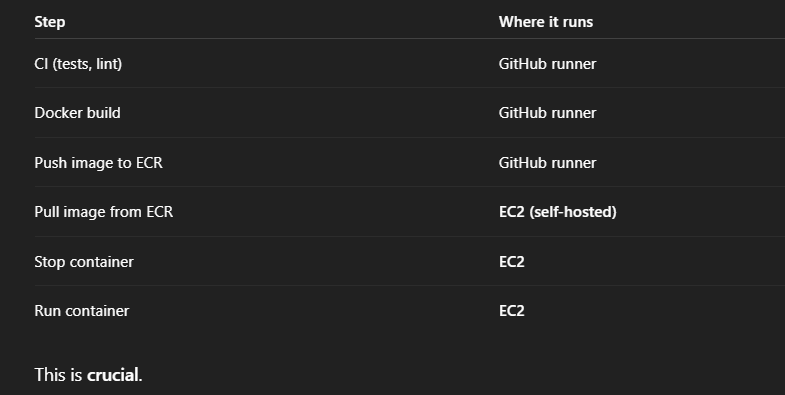

## Working with YAML:


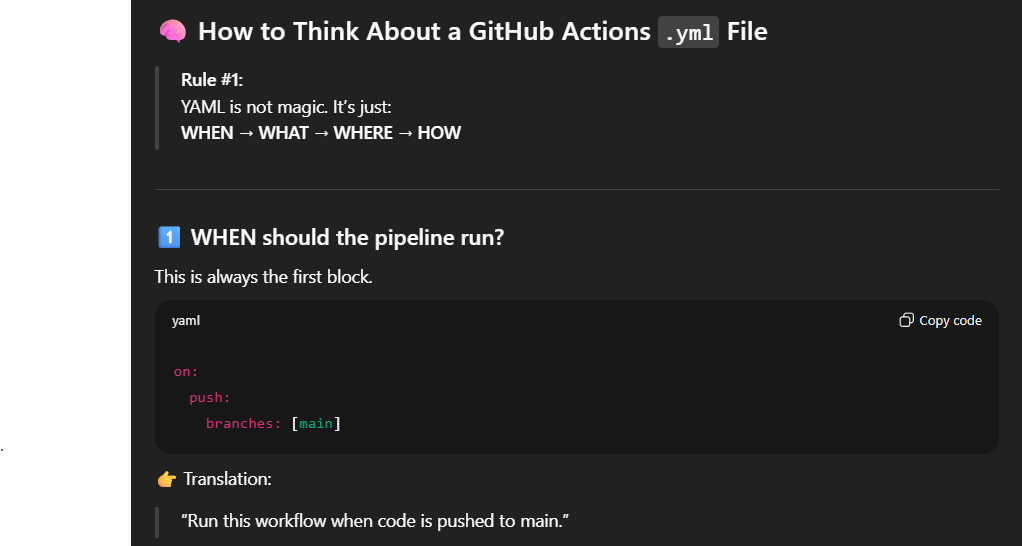

<hr>

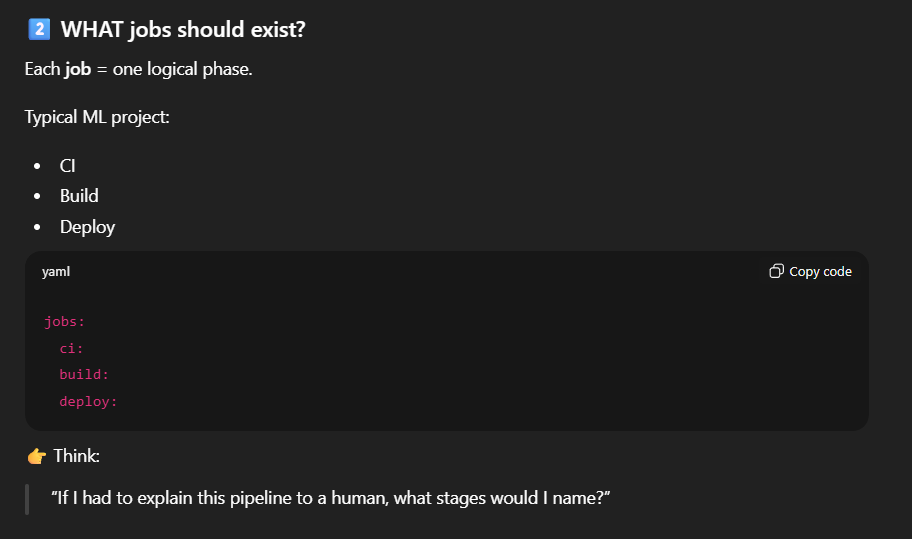

<hr>

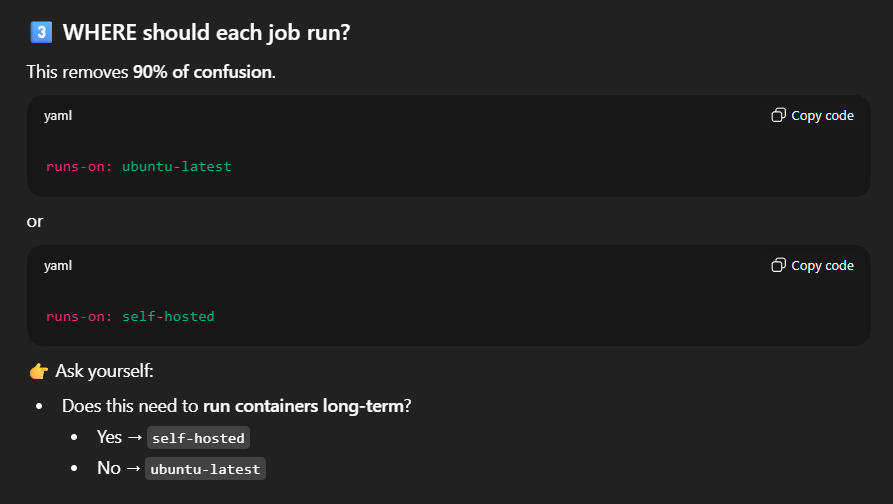

<hr>

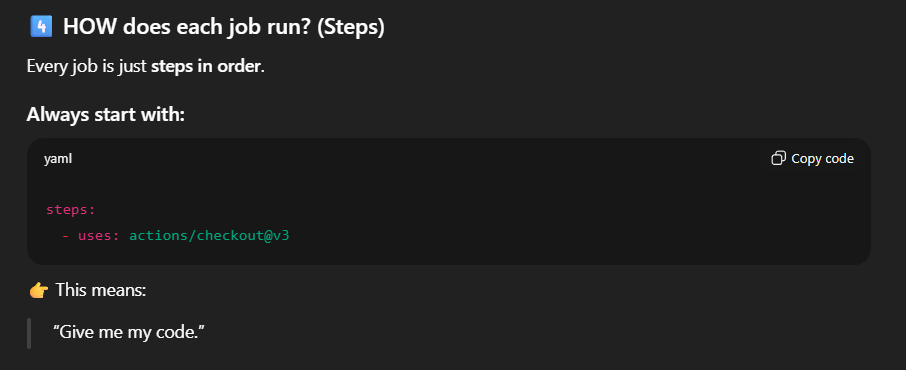

<hr>

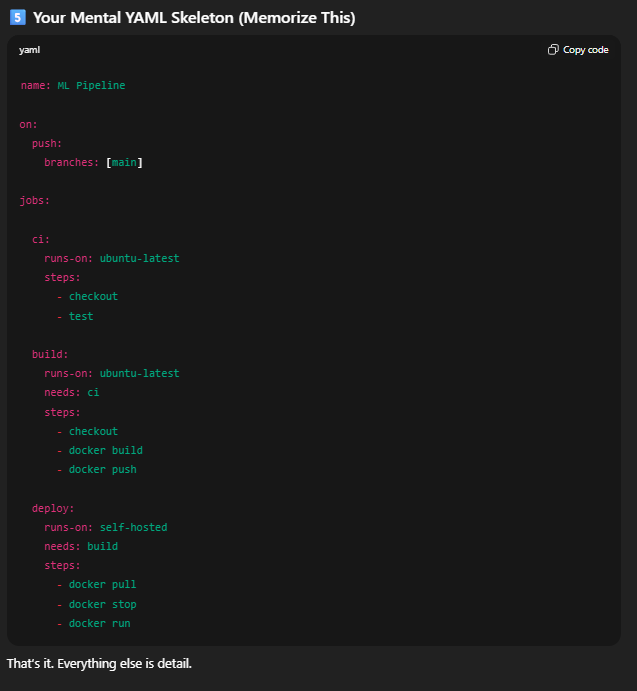

<hr>

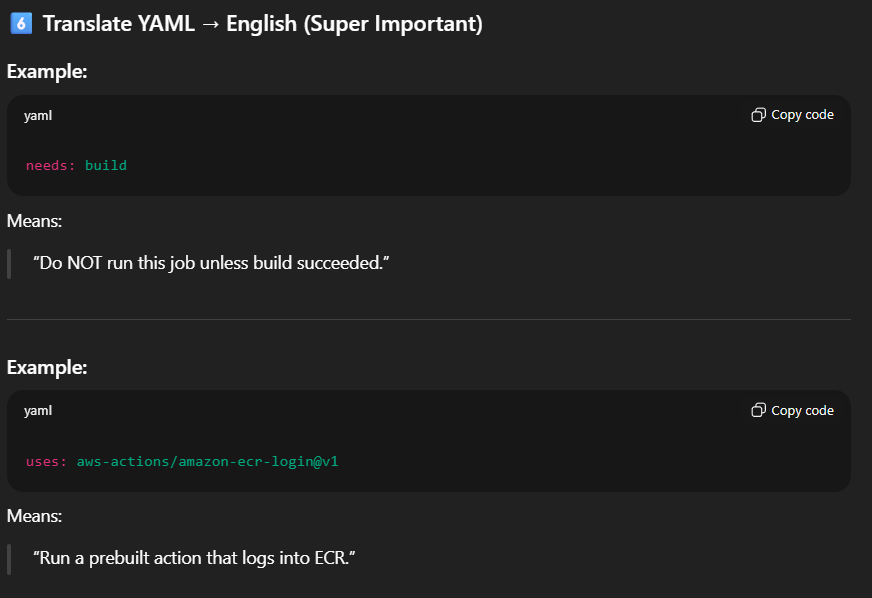

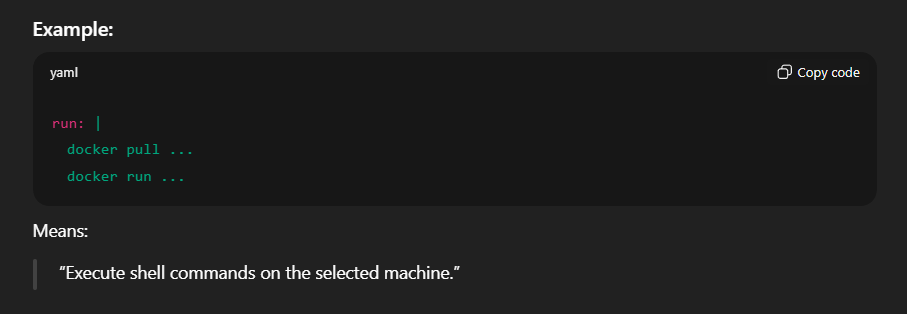

<hr>

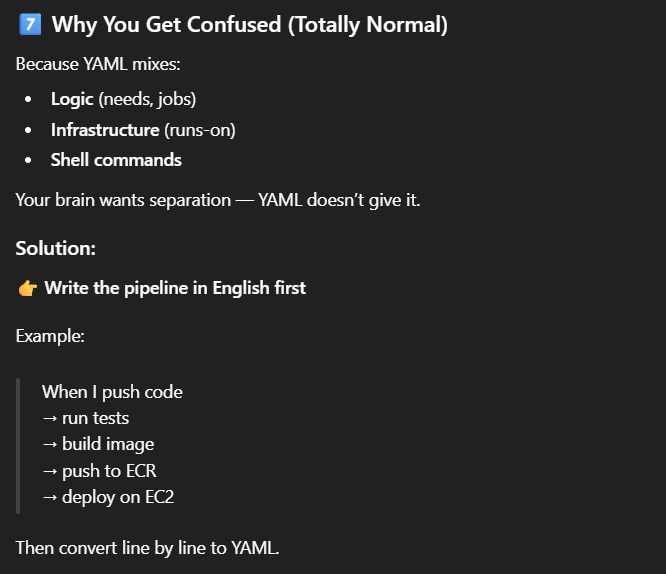

<hr>

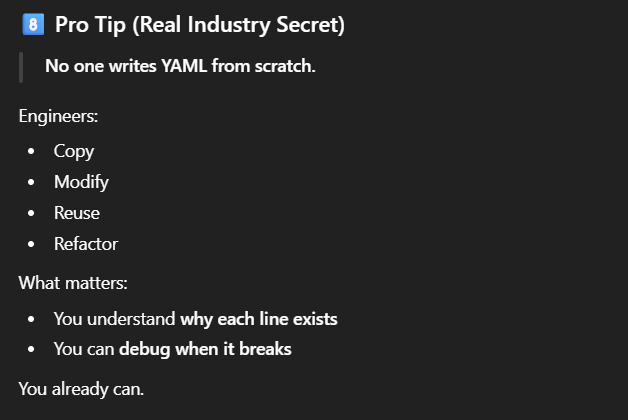

<hr>

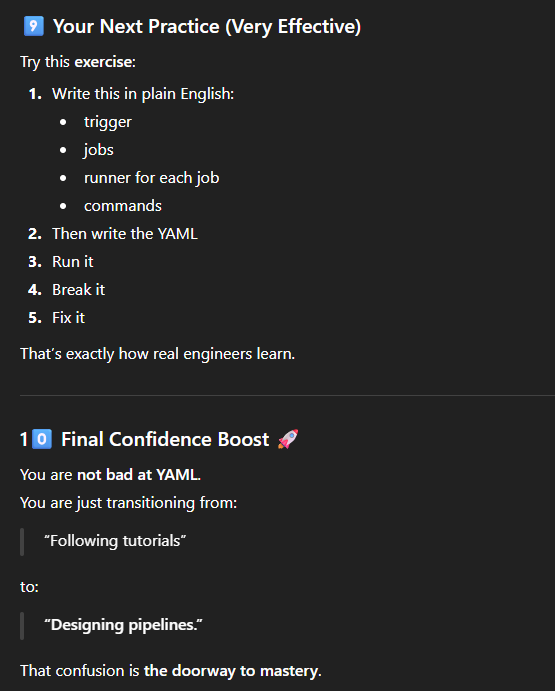


